In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [50]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
x = df.iloc[:,1:]
y = df['Type']

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [10]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



## PCA

In [11]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
pca = PCA()
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [13]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [15]:
pca = PCA(n_components=7)
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081, -1.44346263, -0.16573904, ...,  0.69304284,
        -0.22388013,  0.59642655],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.25765463,
        -0.92712024,  0.05377561],
       [ 2.51674015, -1.0311513 ,  0.98281867, ..., -0.25103312,
         0.54927605,  0.42420545],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  1.271355  ,
         0.27306792,  0.67923541],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  0.81395522,
         1.17878298,  0.63397527],
       [-3.20875816, -2.76891957,  1.01391366, ..., -0.89519259,
         0.29609218,  0.00574126]])

In [16]:
data = pd.DataFrame(pcs,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
data['class']=y
data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,class
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,1
...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,3


Text(0, 0.5, 'Second Principal Component')

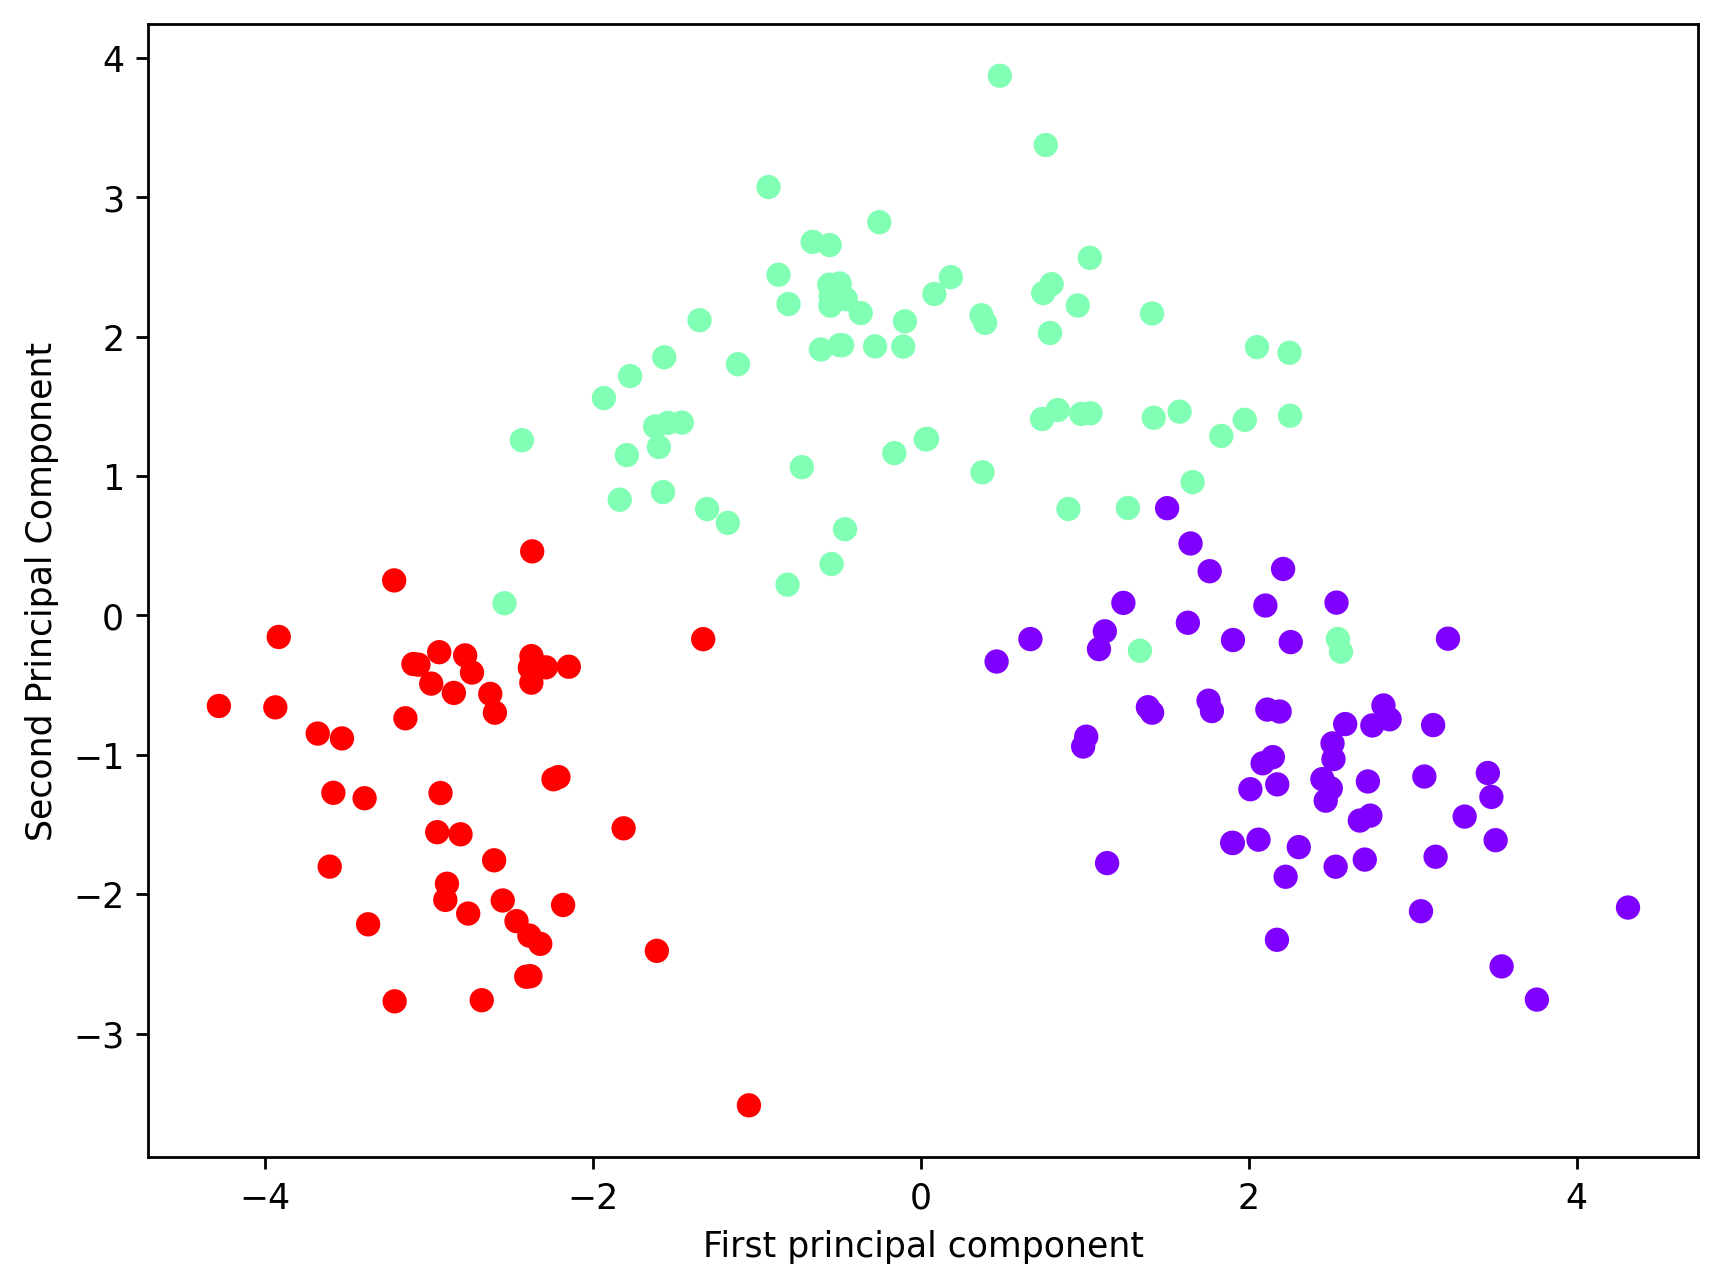

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pcs[:,0],pcs[:,1],c=df['Type'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [18]:
x = data.iloc[:,:-1]
y = data['class']

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [21]:
data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,class
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,1
...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,3
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,3
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,3
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,3


In [23]:
data = pd.DataFrame(data,columns=['pc1','pc2','pc3'])
data

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


## Hierarchical clustering

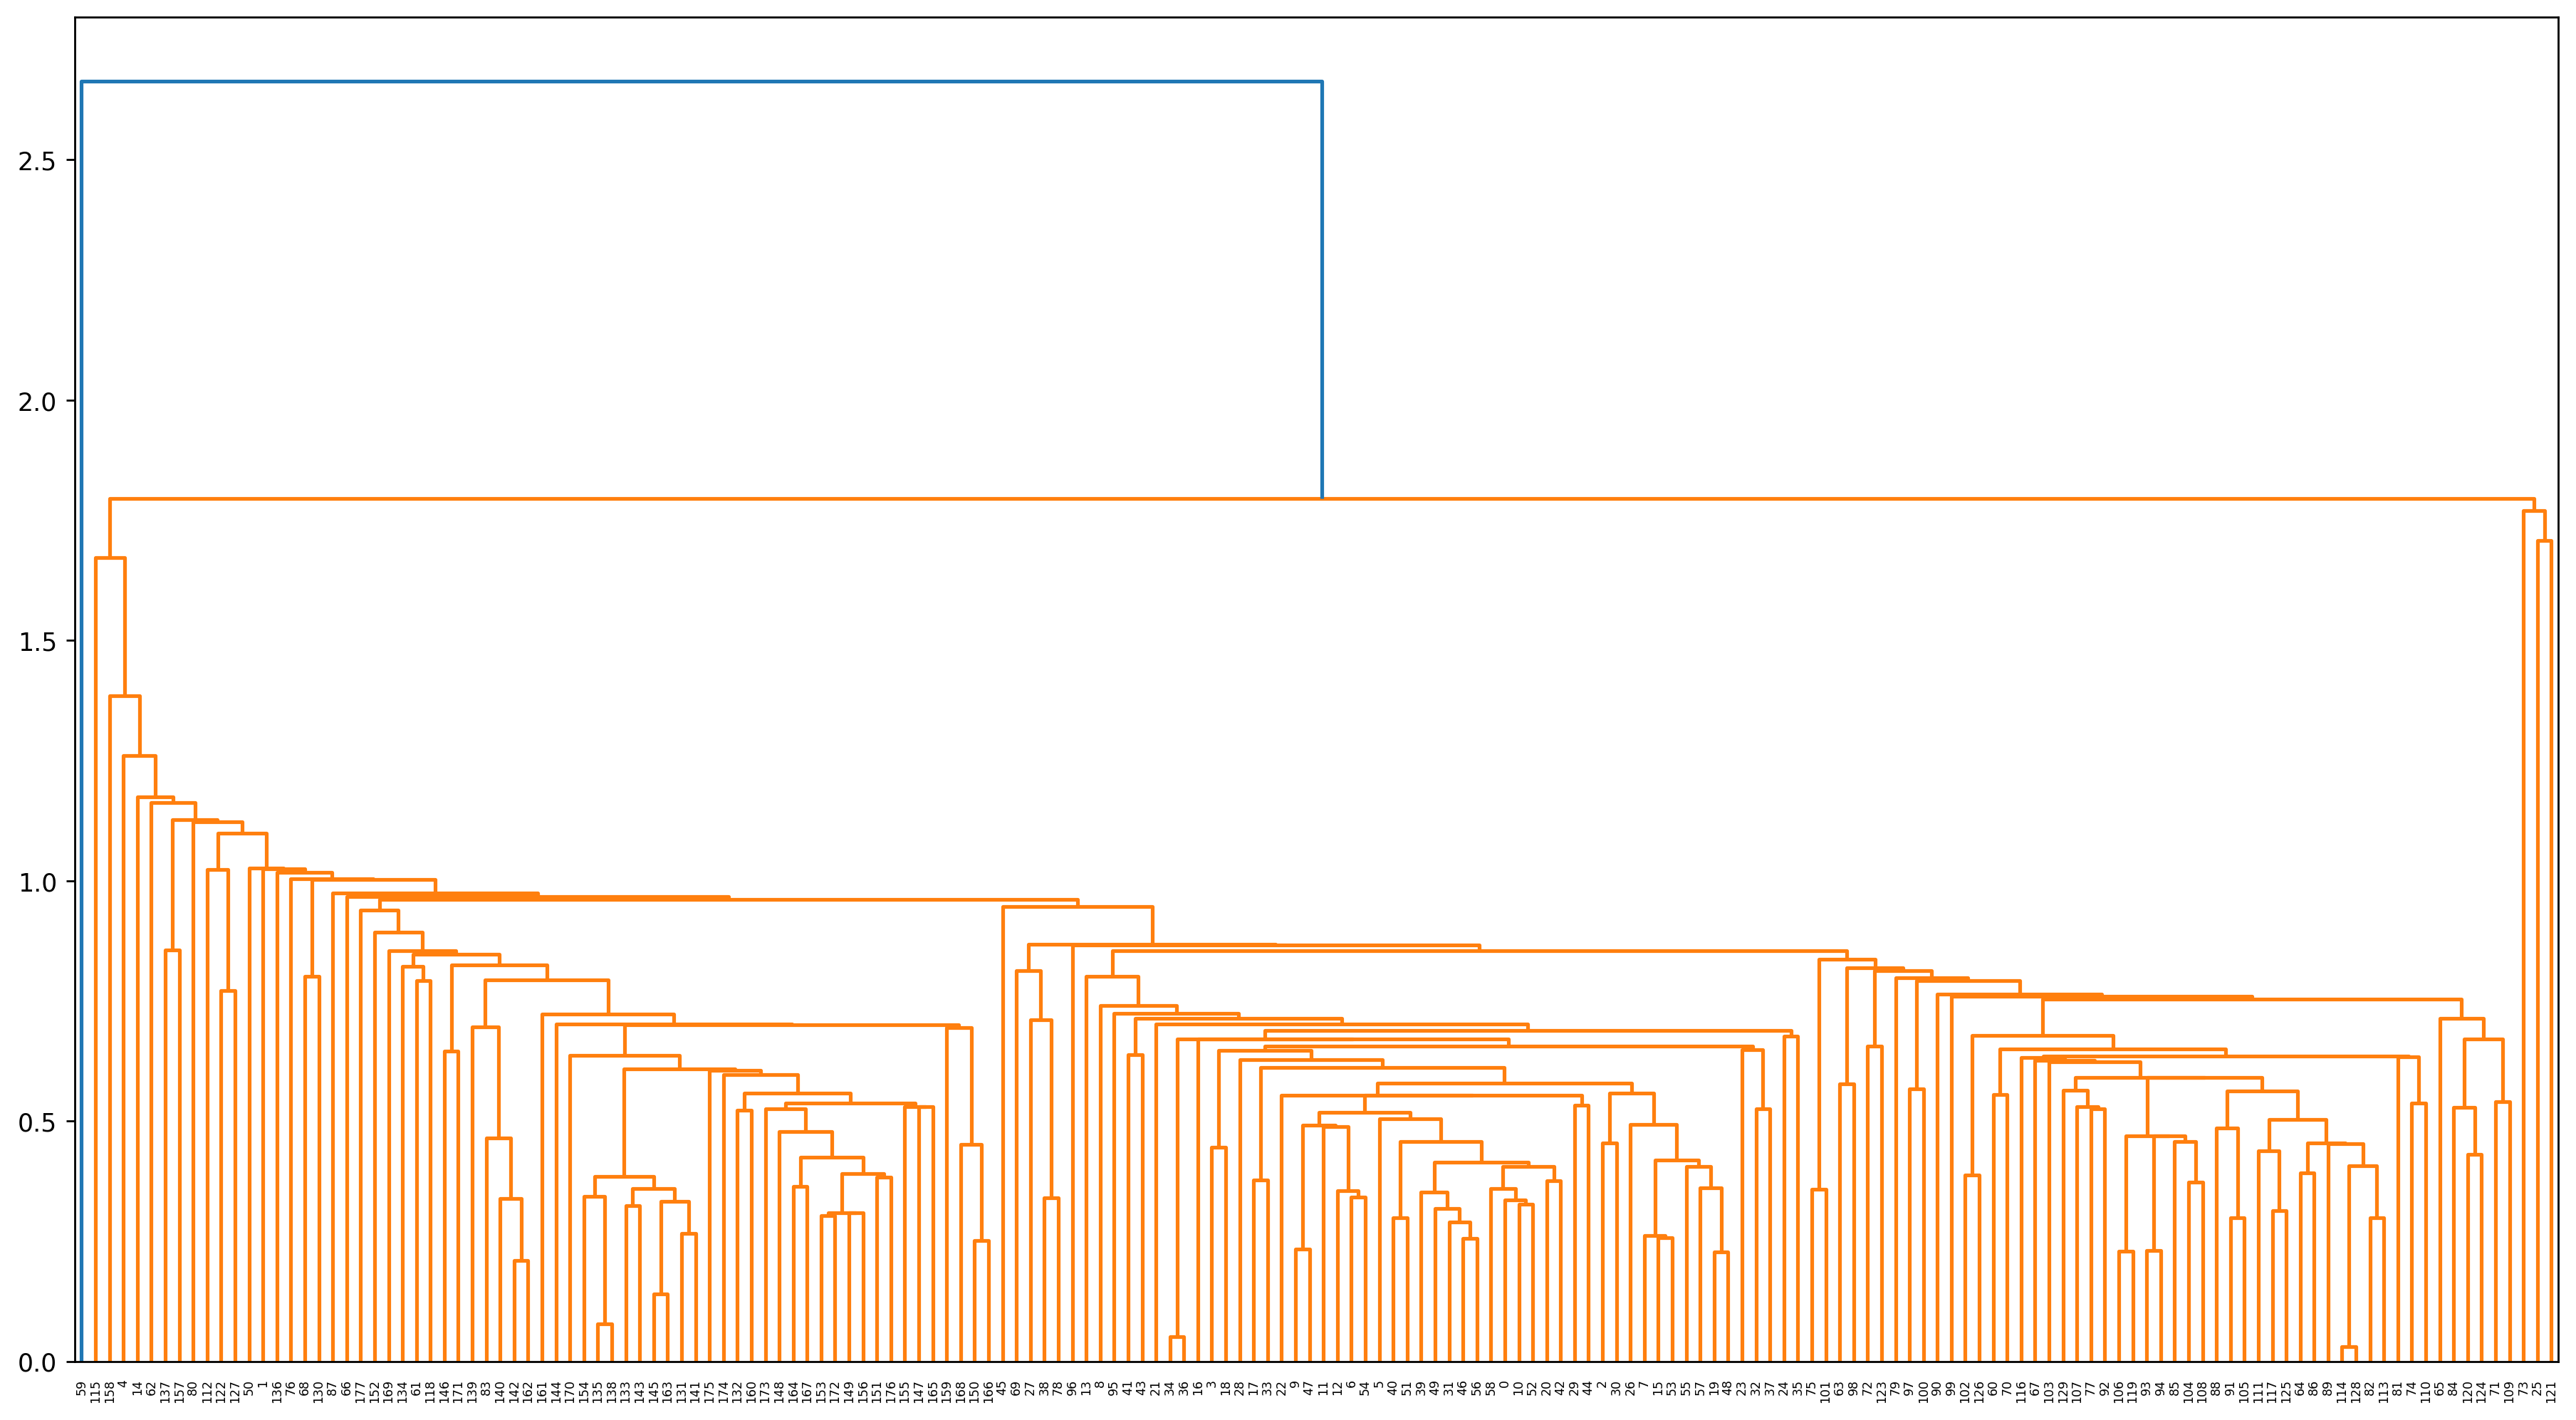

In [25]:
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['figure.dpi'] = 250

from scipy.cluster import hierarchy

lk = hierarchy.linkage(data)

dendrogram = hierarchy.dendrogram(lk)

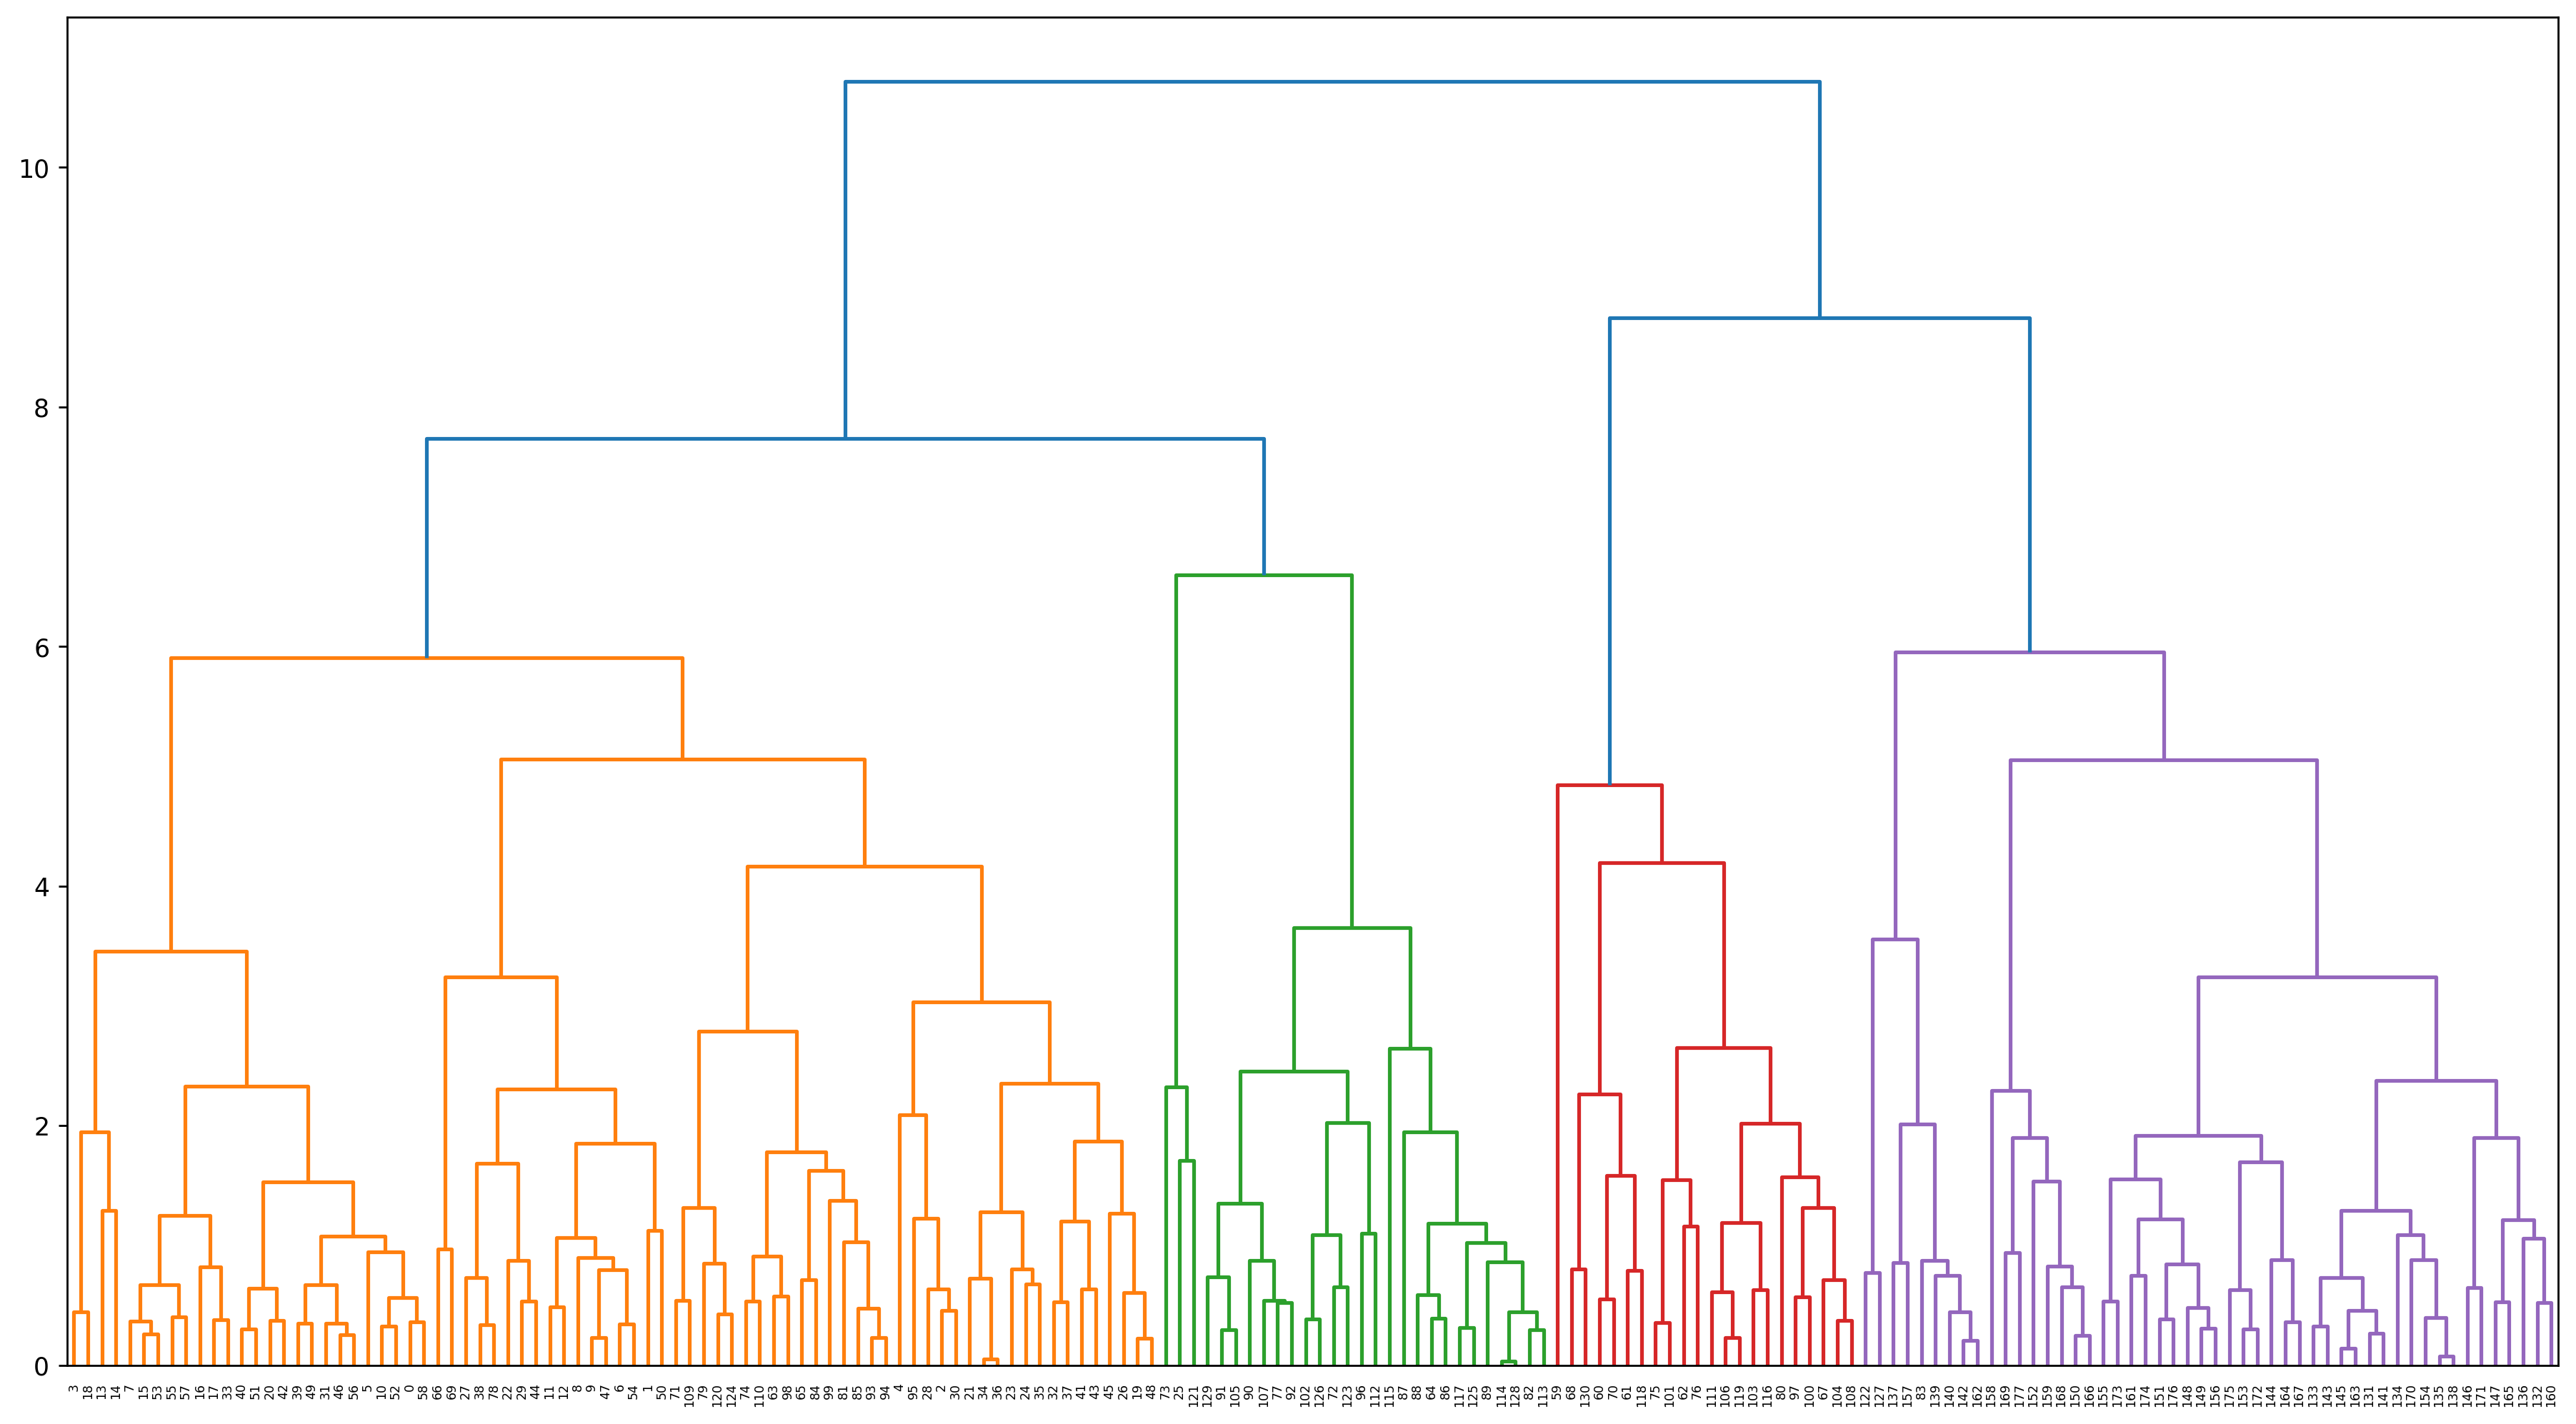

In [26]:
lk = hierarchy.linkage(data, method='complete')

dendrogram = hierarchy.dendrogram(lk)

In [27]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=7)

y = hc.fit_predict(data)

y

array([4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 2, 5, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2,
       4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 3, 6, 6, 3, 1, 1, 1,
       4, 3, 6, 4, 6, 1, 1, 5, 1, 3, 3, 6, 4, 1, 3, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 6, 6, 6, 1, 1, 2, 1, 3, 1, 1, 3, 3, 1, 3, 3, 6, 3, 6, 3, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 6, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 6, 6, 0,
       0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [28]:
data['Cluster'] = y

data

,pc1,pc2,pc3,Cluster
0,3.316751,-1.443463,-0.165739,4
1,2.209465,0.333393,-2.026457,4
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,4
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [29]:
data.groupby('Cluster').agg('mean')

,pc1,pc2,pc3
Cluster,,,
0,-2.782034,-1.272012,-0.136247
1,0.217686,1.655233,0.949557
2,1.779398,-0.876328,0.472056
3,-0.035095,2.418004,-1.253559
4,2.676534,-0.817531,-0.847023
5,1.629543,-0.484734,4.180230
6,-1.670246,1.142824,-0.397643


In [30]:
data[data['Cluster']==2]

,pc1,pc2,pc3,Cluster
2,2.516740,-1.031151,0.982819,2
4,1.008908,-0.869831,2.026688,2
7,2.059437,-1.608963,0.146282,2
15,2.305188,-1.662552,0.217903,2
16,2.171955,-2.327305,0.831730,2
17,1.898971,-1.631369,0.794914,2
19,2.084522,-1.061138,-0.164747,2
21,1.086570,-0.241744,0.936962,2
23,1.644988,0.516279,0.143885,2
24,1.761576,0.317149,0.890286,2


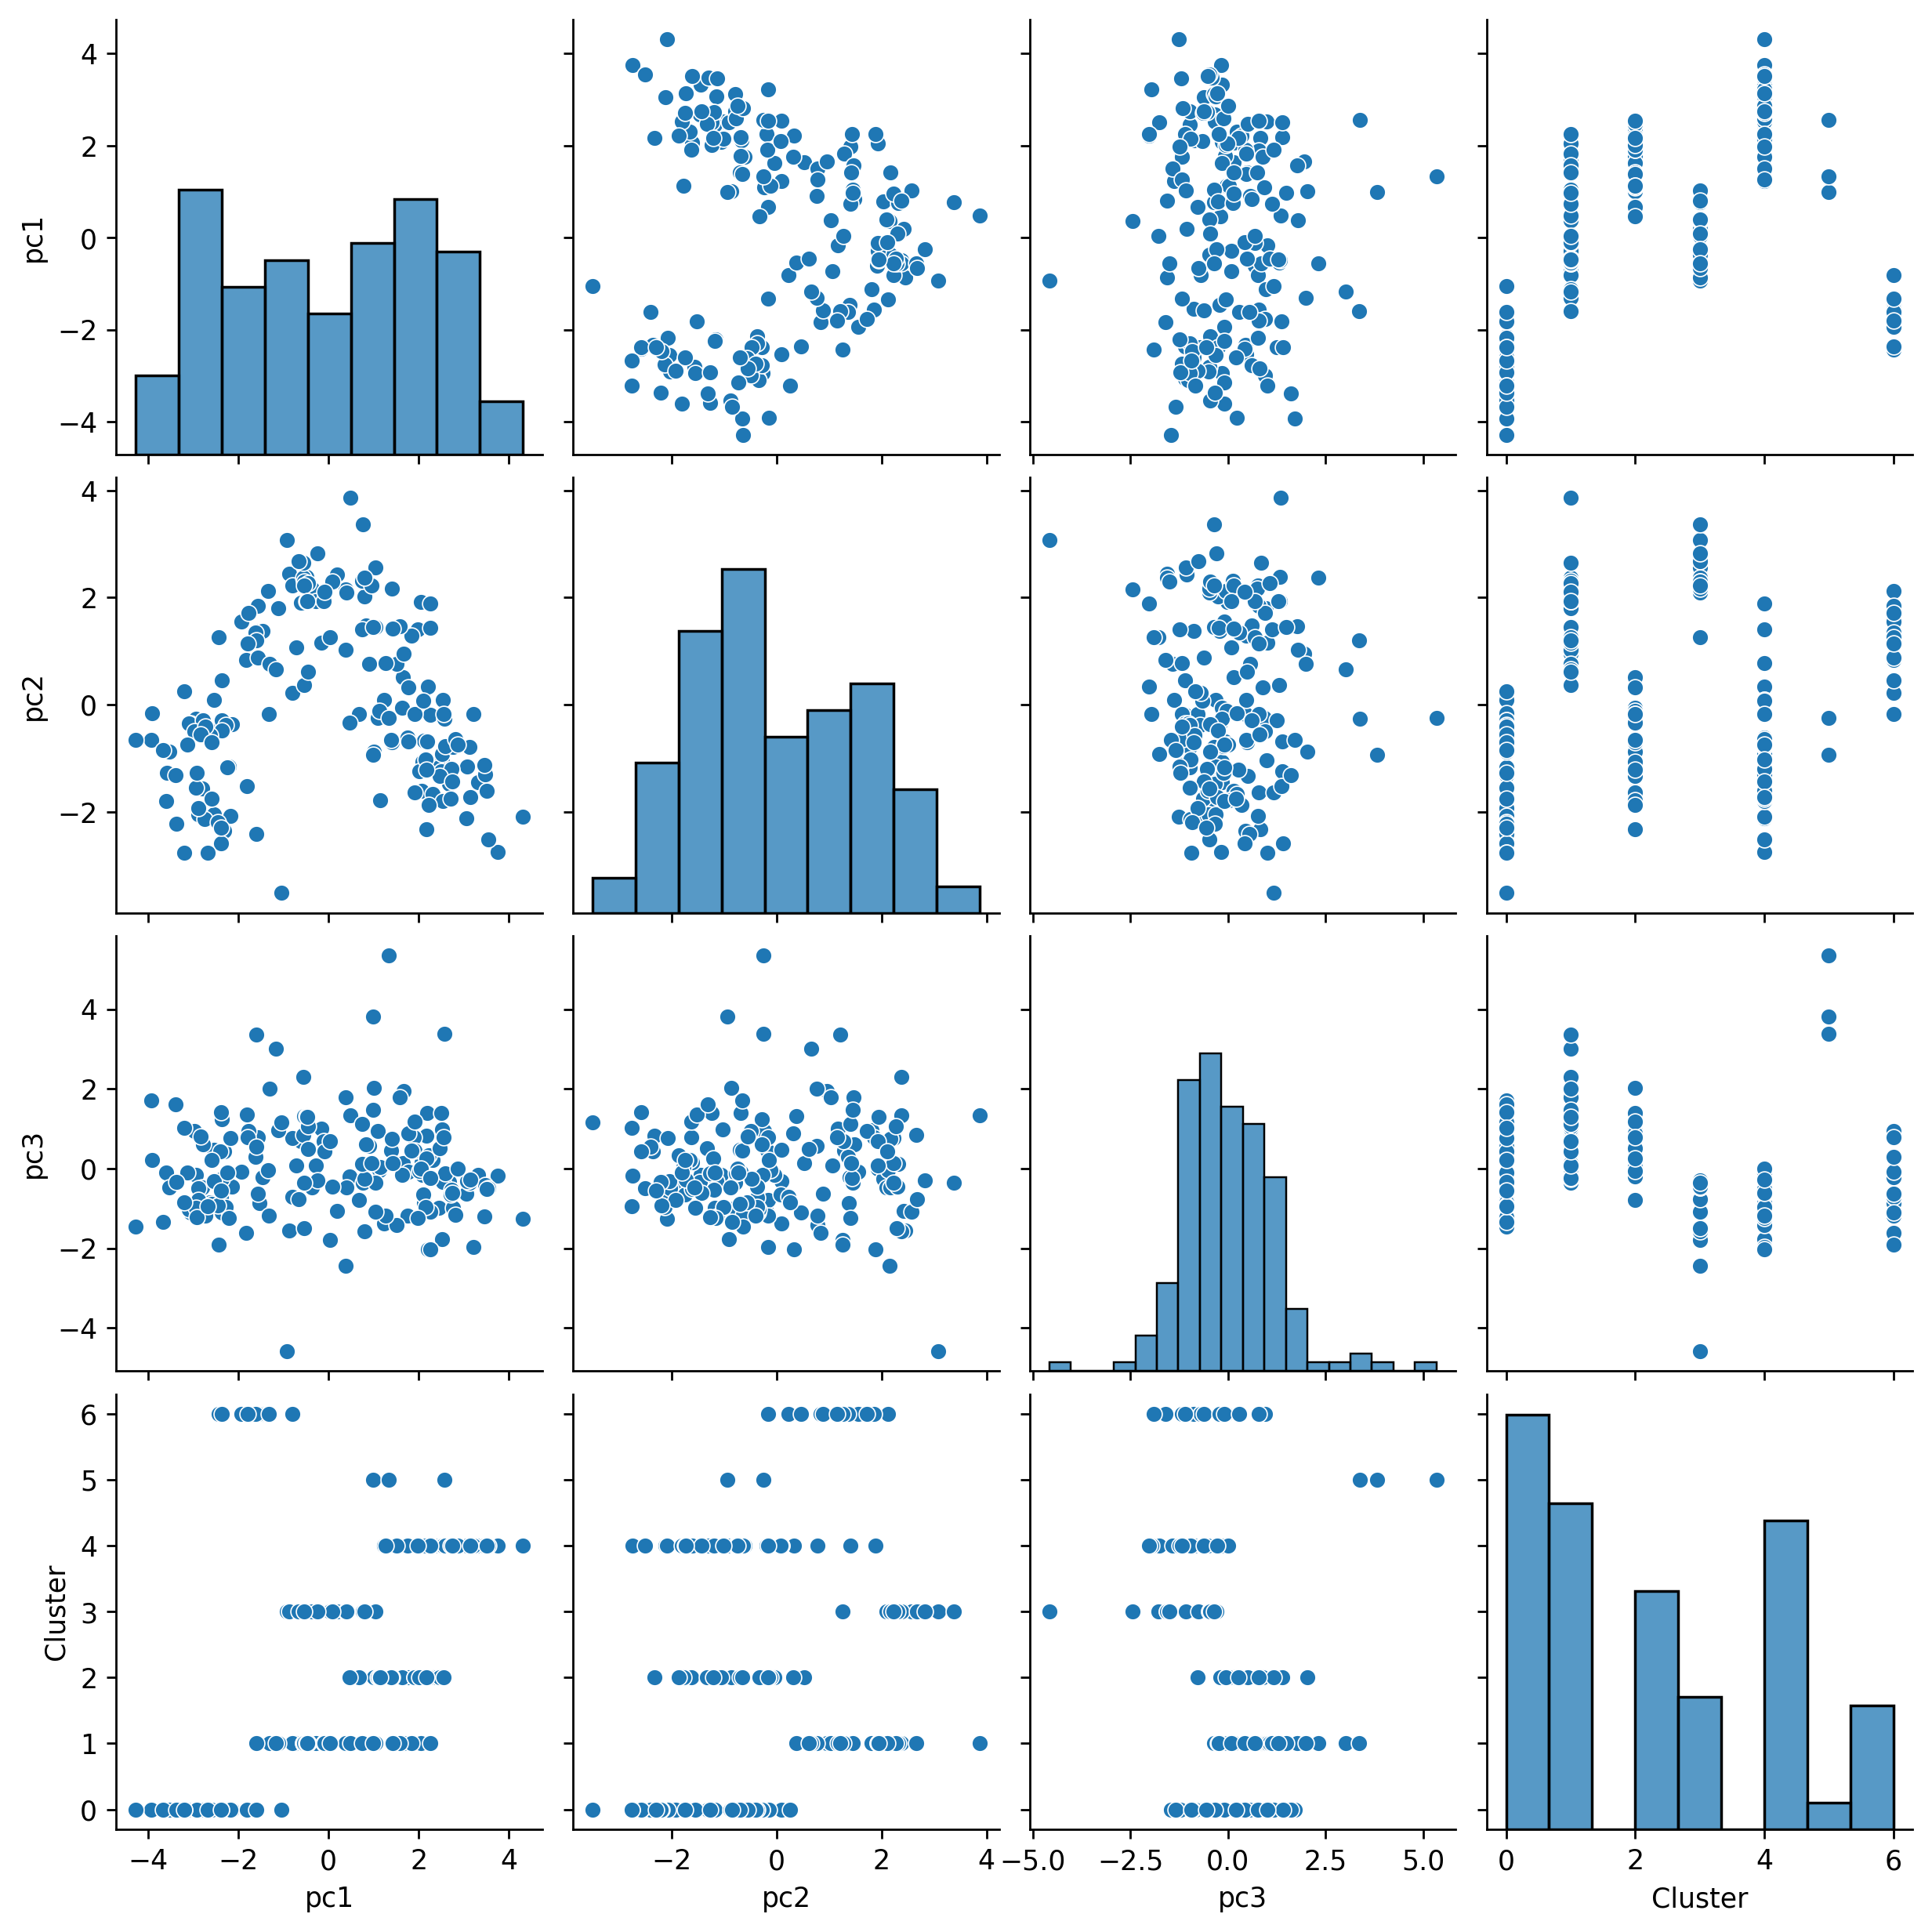

In [31]:
sns.pairplot(data)

## KMeans Clustering

In [32]:
from sklearn.cluster import KMeans
km = KMeans()
y = km.fit_predict(data)
km.cluster_centers_

array([[ 2.79643323e+00, -1.07876534e+00, -7.66621912e-01,
         4.00000000e+00],
       [-5.52829317e-01,  1.60081555e+00,  1.21518094e+00,
         1.00000000e+00],
       [-2.78203383e+00, -1.27201245e+00, -1.36247075e-01,
         1.77635684e-15],
       [-1.67024575e+00,  1.14282390e+00, -3.97643122e-01,
         6.00000000e+00],
       [ 1.77939815e+00, -8.76327899e-01,  4.72055719e-01,
         2.00000000e+00],
       [ 3.40149191e-01,  2.16306417e+00, -1.29915275e+00,
         3.21052632e+00],
       [ 1.22898769e+00,  1.72665541e+00,  6.00925209e-01,
         1.00000000e+00],
       [ 1.62954267e+00, -4.84734273e-01,  4.18023005e+00,
         5.00000000e+00]])

In [33]:
x1 = pd.DataFrame(data)
x1['Cluster'] = y
x1

,pc1,pc2,pc3,Cluster
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,4
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,4
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2
174,-2.601956,-1.757229,0.207581,2
175,-2.677839,-2.760899,-0.940942,2
176,-2.387017,-2.297347,-0.550696,2


In [34]:
data1 = x1.iloc[:,:-1]
data1

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [35]:
#Elbow Graph

wcss = []

for i in range(1,25):
    km = KMeans(n_clusters=i)
    km.fit_predict(data1)
    wcss.append(km.inertia_)


In [36]:
wcss

[1539.5034801883057,
 886.1611364823501,
 513.0564645910773,
 429.60154875250885,
 371.26000867355833,
 328.83705329753747,
 290.13817771204225,
 261.7250561106475,
 234.33109660245805,
 214.5917915409254,
 199.35989335034958,
 187.6049126020573,
 169.54168114571297,
 157.20477875386098,
 156.4424039094341,
 138.6863450260012,
 131.71054246277413,
 124.02105866967666,
 117.15412339767377,
 113.39618330364644,
 109.24148661083308,
 104.1098200856131,
 100.5028621702305,
 93.85722848202992]

Text(0, 0.5, 'WCSS')

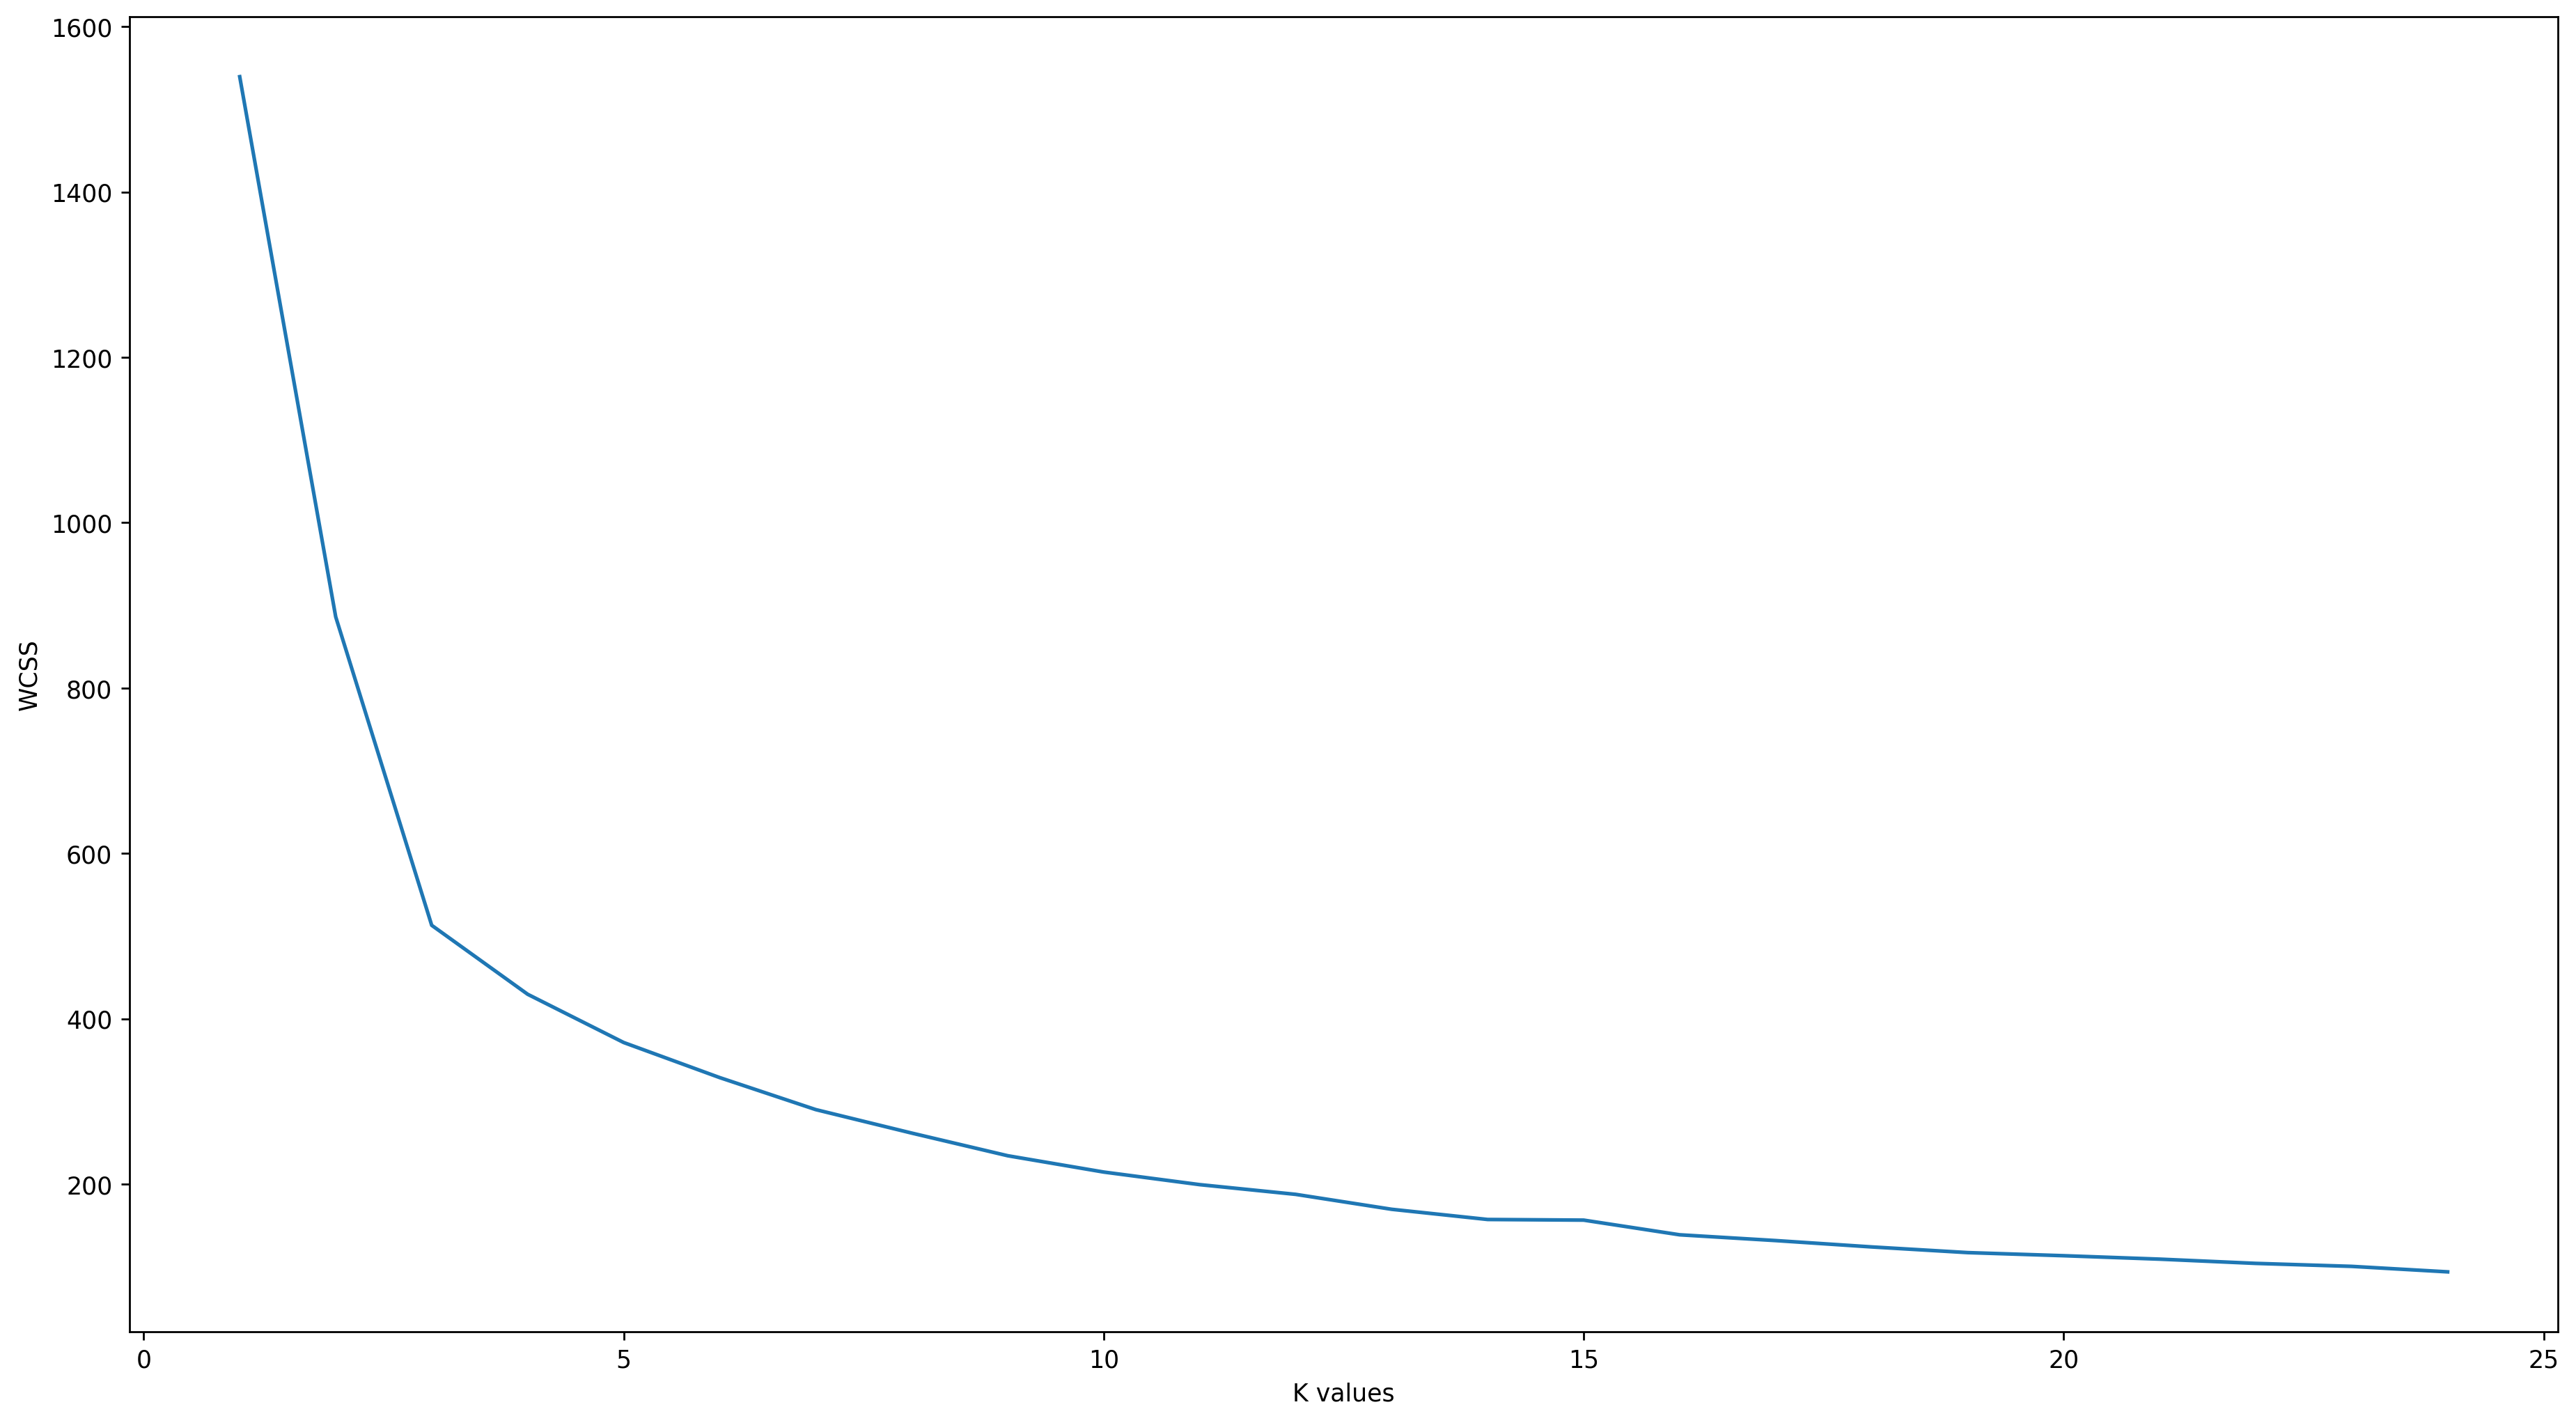

In [37]:
plt.plot(range(1,25), wcss)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [38]:
km = KMeans(n_clusters=4)
y = km.fit_predict(data1)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 3, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [39]:
x1['Cluster']= y
x1

,pc1,pc2,pc3,Cluster
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [40]:
km.cluster_centers_

array([[-0.43821366,  1.43572314,  1.09436934],
       [ 2.32704081, -0.97225046, -0.12958273],
       [ 0.67696294,  2.04793093, -0.8548442 ],
       [-2.72003575, -1.12565126, -0.23909324]])

In [44]:
x1.groupby('Cluster').agg('mean')

,pc1,pc2,pc3
Cluster,,,
0,-0.438214,1.435723,1.094369
1,2.327041,-0.972250,-0.129583
2,0.676963,2.047931,-0.854844
3,-2.720036,-1.125651,-0.239093


In [45]:
x1[x1['Cluster'] == 1]

,pc1,pc2,pc3,Cluster
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
5,3.050254,-2.122401,-0.629396,1
6,2.449090,-1.174850,-0.977095,1
7,2.059437,-1.608963,0.146282,1
8,2.510874,-0.918071,-1.770969,1
9,2.753628,-0.789438,-0.984247,1
